In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/My Drive/audio-image-genai/Audio to Image Using GENAI.ipynb" "/content/Audio_Image_GENAI.ipynb"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.7.1+cu118
True


In [ ]:
!pip install --upgrade torch torchvision torchaudio
!pip install --upgrade diffusers transformers accelerate scipy
!pip install speechrecognition pydub


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.5/10.5 MB 95.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.0/3.0 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3


In [ ]:
!apt install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 1.opus to 1.opus


In [ ]:
from pydub import AudioSegment

# This works if FFmpeg is correctly installed
audio = AudioSegment.from_file("1.opus")  # removed format="opus"
audio.export("converted.wav", format="wav")


<_io.BufferedRandom name='converted.wav'>

In [ ]:
import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("converted.wav") as source:
    audio_data = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio_data)
    print("üé§ Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    text = None


üé§ Recognized Text: rose flowers


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

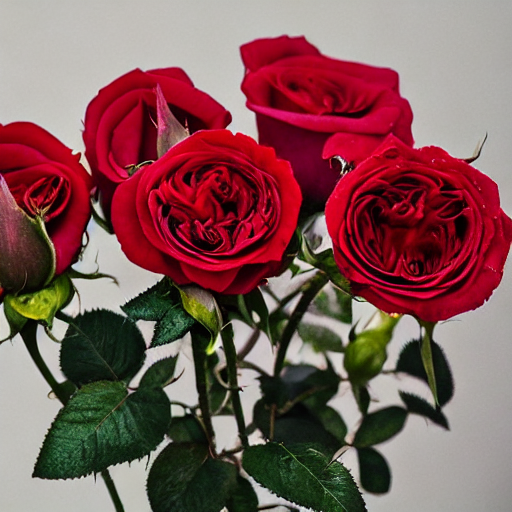

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")

if text:
    image = pipe(text).images[0]
    image.save("output.png")
    display(image)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 2.opus to 2.opus


In [ ]:
from pydub import AudioSegment

# This works if FFmpeg is correctly installed
audio = AudioSegment.from_file("2.opus")  # removed format="opus"
audio.export("converted.wav", format="wav")


<_io.BufferedRandom name='converted.wav'>

In [ ]:
import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("converted.wav") as source:
    audio_data = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio_data)
    print("üé§ Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    text = None


üé§ Recognized Text: bunch of trees on the straight


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

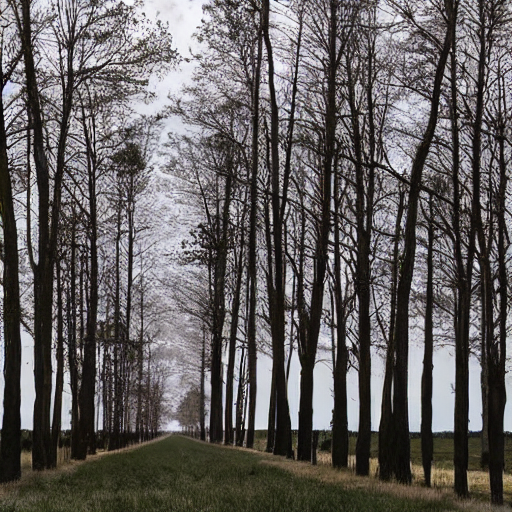

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")

if text:
    image = pipe(text).images[0]
    image.save("output.png")
    display(image)


Saving 3.opus to 3.opus
üé§ Recognized Text: mountains


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

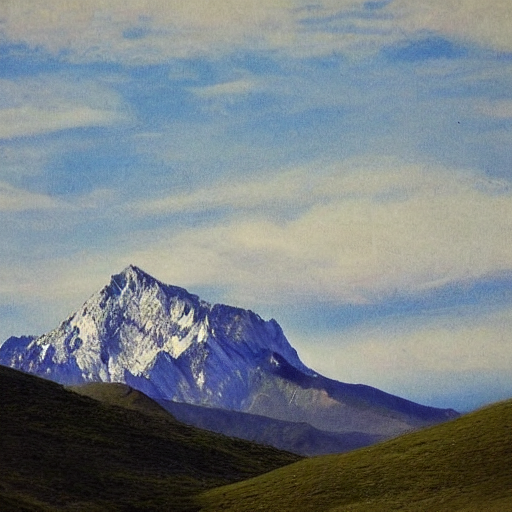

In [ ]:
from google.colab import files
uploaded = files.upload()

from pydub import AudioSegment

# This works if FFmpeg is correctly installed
audio = AudioSegment.from_file("3.opus")  # removed format="opus"
audio.export("converted.wav", format="wav")

import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("converted.wav") as source:
    audio_data = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio_data)
    print("üé§ Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    text = None

from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")

if text:
    image = pipe(text).images[0]
    image.save("output.png")
    display(image)
